<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>




<h1 style="color: Green;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
Plants Disease Image Classifier
</h1>




<img src="https://www.shutterstock.com/image-photo/bacterial-spots-leaves-surface-blight-600nw-1162488304.jpg" alt="Plant" style="width:320px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;">| <img src="https://winetitles.com.au/wp-content/uploads/2025/03/thumbnail_IMG_7135.jpg" alt="Plant" style="width:320px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQljUXgnvv8WeSIrBXwIKJ1LbmV_khMyUpgBA&s" alt="Plant" style="width:320px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;">
---------|----------|---------


### Author: `Ali Hassan`

[Plants Disease Dataset](https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset)\
About Dataset\
Human society needs to increase food production by an estimated 70% by 2050 to feed an expected population size that is predicted to be over 9 billion people. Currently, infectious diseases reduce the potential yield by an average of 40% with many farmers in the developing world experiencing yield losses as high as 100%. The widespread distribution of smartphones among crop growers around the world with an expected 5 billion smartphones by 2020 offers the potential of turning the smartphone into a valuable tool for diverse communities growing food. One potential application is the development of mobile disease diagnostics through machine learning and crowdsourcing. Here we announce the release of over 50,000 expertly curated images on healthy and infected leaves of crops plants through the existing online platform PlantVillage. We describe both the data and the platform. These data are the beginning of an on-going, crowdsourcing effort to enable computer vision approaches to help solve the problem of yield losses in crop plants due to infectious diseases.

<div style="font-family:Arial, sans-serif; color:green; font-size:20px;  line-height:1.6; letter-spacing:0.5px; padding:5px 0;">
  <ul style="list-style-type:disc; padding-left:20px; margin:0;">
    <li style="margin-bottom:6px;">The Numbers of Classes are <b>38</b> </li>
    <li style="margin-bottom:6px;">Training: Found 43456 images belonging to 38 classes.</li>
    <li style="margin-bottom:6px;">Validation: Found 10849 images belonging to 38 classes.</li>
    <li style="margin-bottom:6px;">Using the <b>CNN</b> Model</li>
    <li style="margin-bottom:6px;">Test Accuracy is <b>92.00%</b></li>
    <li style="margin-bottom:6px;">Test Loss is <b>21%</b></li>
  </ul>
</div>



<h3 style="color: brown;font-family: 'Times New Roman', Times, serif; font-weight: bold;">Import Libraries</h3>

In [19]:
import pandas as pd

import numpy as np
np.random.seed(0)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import os,random
random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

from tensorflow.keras import datasets
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model,load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Specifying the Path</h3>

In [20]:
path='plantvillage dataset'

In [21]:
print(os.listdir(path))

print(len(os.listdir('plantvillage dataset/segmented')))
print(len(os.listdir('plantvillage dataset/segmented')[:5]))

print('---------------------------------------------------------')

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print('---------------------------------------------------------')

print(os.listdir('plantvillage dataset/grayscale'))
print(os.listdir('plantvillage dataset/grayscale')[:5])

['color', 'grayscale', 'segmented']
38
5
---------------------------------------------------------
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
---------------------------------------------------------
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'S

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Displaying the Image</h3>

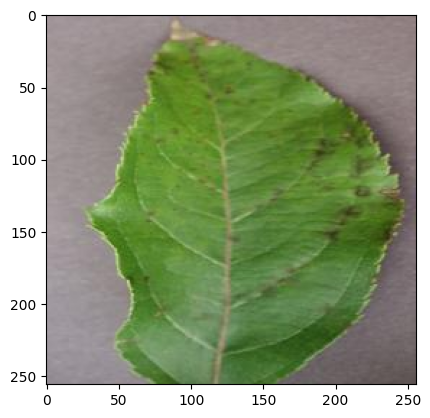

In [22]:
color_direc="plantvillage dataset/color"
color_direc_img=r'C:\Users\user\Desktop\My Projects\DL Projects\Plant Disease Image Classifier\plantvillage dataset\color\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG'

img=mpimg.imread(color_direc_img)
plt.imshow(img)
plt.show()

In [23]:
print(img)

[[[160 148 152]
  [161 149 153]
  [161 149 153]
  ...
  [145 129 130]
  [142 126 127]
  [140 124 125]]

 [[160 148 152]
  [160 148 152]
  [160 148 152]
  ...
  [141 125 126]
  [139 123 124]
  [138 122 123]]

 [[162 150 154]
  [161 149 153]
  [160 148 152]
  ...
  [141 125 126]
  [142 126 127]
  [142 126 127]]

 ...

 [[151 144 151]
  [150 143 150]
  [148 141 148]
  ...
  [ 94  84  83]
  [ 92  82  81]
  [ 92  82  81]]

 [[148 141 148]
  [147 140 147]
  [147 140 147]
  ...
  [ 93  83  82]
  [ 92  82  81]
  [ 91  81  80]]

 [[144 137 144]
  [144 137 144]
  [145 138 145]
  ...
  [ 93  83  82]
  [ 92  82  81]
  [ 91  81  80]]]


In [24]:
# Image Paramters

img_size=224
batch_size=32

In [25]:
# Train / Test Split
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [26]:
# Training
train_generator=data_gen.flow_from_directory(
    color_direc,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [27]:
# validation Generator

val_generator=data_gen.flow_from_directory(
    color_direc,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Building CNN Model</h3>

In [28]:
model = models.Sequential()

# Convolutional block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))  # Recommended: add pooling
model.add(layers.Dropout(0.4))

# Global Average Pooling (better than Flatten for CNN)
model.add(layers.GlobalAveragePooling2D())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [29]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 64)    

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Training the  Model</h3>

In [30]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',       # Watch validation loss
    patience=3,               # Stop if no improvement for 3 epochs
    restore_best_weights=True # Roll back to best weights
)

checkpoint = ModelCheckpoint(
    "best_model.h5",          # File to save best model
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
1358/1358 [==============================] - ETA: 0s - loss: 1.3025 - accuracy: 0.6280
Epoch 1: val_loss improved from inf to 2.38818, saving model to best_model.h5
1358/1358 [==============================] - 117s 85ms/step - loss: 1.3025 - accuracy: 0.6280 - val_loss: 2.3882 - val_accuracy: 0.4377
Epoch 2/10
1358/1358 [==============================] - ETA: 0s - loss: 0.6229 - accuracy: 0.8074
Epoch 2: val_loss improved from 2.38818 to 0.73939, saving model to best_model.h5
1358/1358 [==============================] - 115s 85ms/step - loss: 0.6229 - accuracy: 0.8074 - val_loss: 0.7394 - val_accuracy: 0.7846
Epoch 3/10
1358/1358 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.8676
Epoch 3: val_loss improved from 0.73939 to 0.53849, saving model to best_model.h5
1358/1358 [==============================] - 117s 86ms/step - loss: 0.4245 - accuracy: 0.8676 - val_loss: 0.5385 - val_accuracy: 0.8390
Epoch 4/10
1358/1358 [==============================] - 

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Model Evaluation</h3>

In [32]:
# Model Evaluation
val_loss,val_acc=model.evaluate(val_generator,steps=val_generator.samples//batch_size)
print("\nTest Accuracy: ",val_acc)
print("Test Loss: ",val_loss)

339/339 [==============================] - 16s 47ms/step - loss: 0.3406 - accuracy: 0.8831

Test Accuracy:  0.8831120729446411
Test Loss:  0.3405613303184509


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Plotting Validation and Loss</h3>

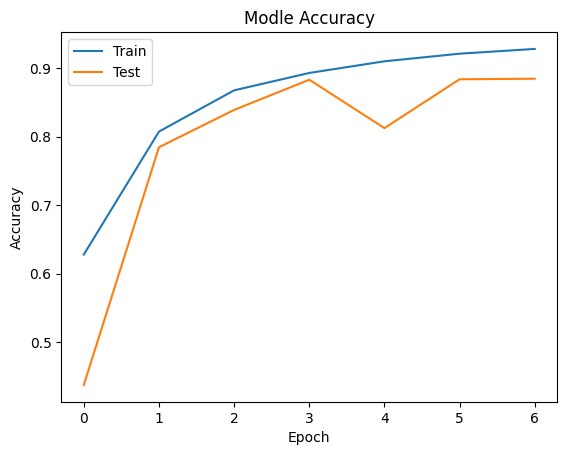

In [33]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modle Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

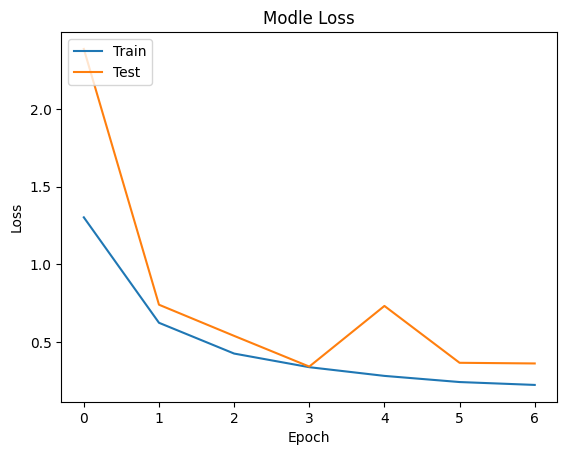

In [34]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Modle Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Making the Predictive System</h3>

In [39]:
from PIL import Image
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [40]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
# Example Usage
image_path = 'pepper.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 31ms/step
Predicted Class Name: Pepper,_bell___Bacterial_spot
